In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('new.csv')
data.head()

,Unnamed: 0,date,time,price
0,0,20150105,100100,1064.0
1,1,20150105,100200,1064.0
2,2,20150105,100300,1064.0
3,3,20150105,100400,1064.0
4,4,20150105,100500,1064.0


In [3]:
data['date']= data['date'].map(str)
data['time']= data['time'].map(str)
data['year'], data['month'], data['day'] = data['date'].map(lambda x: x[:4]), data['date'].map(lambda x: x[4:6]), data['date'].map(lambda x: x[6:8])
data['hour'], data['minute'], data['second'] = data['time'].map(lambda x: x[:2]), data['time'].map(lambda x: x[2:4]), data['time'].map(lambda x: x[4:6])

In [4]:
df = data
df

,Unnamed: 0,date,time,price,year,month,day,hour,minute,second
0,0,20150105,100100,1064.0,2015,01,05,10,01,00
1,1,20150105,100200,1064.0,2015,01,05,10,02,00
2,2,20150105,100300,1064.0,2015,01,05,10,03,00
3,3,20150105,100400,1064.0,2015,01,05,10,04,00
4,4,20150105,100500,1064.0,2015,01,05,10,05,00
...,...,...,...,...,...,...,...,...,...,...
262103,131537,20161230,183800,1248.5,2016,12,30,18,38,00
262104,131538,20161230,183900,1248.5,2016,12,30,18,39,00
262105,131539,20161230,184000,1248.5,2016,12,30,18,40,00
262106,131540,20161230,184600,1247.5,2016,12,30,18,46,00


In [5]:
df = df.assign(datetime=[f"{str(year)}-{str(month)}-{str(day)} {str(hour)}:{str(minute)}:{str(second)}" for year, month, day, hour, minute, second in zip(df['year'], df['month'], df['day'], df['hour'], df['minute'], df['second'])])[['price', 'datetime']]

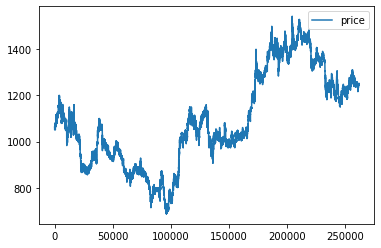

In [37]:
import matplotlib.pyplot as plt

df.plot()

 ## Возможно совершить максимум одну транзакцию покупки-продажи

In [119]:
def maxProfit(price):
  left, right = 0, 1
  profit = 0
  low, high = 0, 0
  while(right < len(price)):
    if price[left] <= price[right]:
      if price[right] - price[left] > profit:
        profit = price[right] - price[left]
        low, high = left, right
      right += 1
    else:
      left = right
      right += 1
        
  return profit, low, high

In [120]:
profit, day1, day2 = maxProfit(list(df.price))
print("Дата покупки: ",list(df.datetime[df.index == day1]), "\t", "Дата продажи: ",list(df.datetime[df.index == day2]), '\t', 'Прибыль: ',profit)

Дата покупки:  ['2015-09-29 11:02:00'] 	 Дата продажи:  ['2016-07-28 16:34:00'] 	 Прибыль:  856.0


In [77]:
day1

96149

## Возможно совершить до двух транзакций покупки-продажи, но нельзя накапливать акции в портфеле, то есть каждый раз перед покупкой вы должны сначала продать все имеющиеся акции.

In [123]:
def max_profit_ii_1(prices):
    first_buy, second_buy, first_profit, second_profit = 1e9,1e9, 0, 0
    p1, p2 = 0, 0
    b1, b2 = 0, 0
    y = [] 
    i = 0
    while i < len(prices):
        if prices[i] < first_buy:
          first_buy = prices[i]
          p1 = i
        if (prices[i] - first_buy) > first_profit:
          first_profit = max(first_profit, prices[i] - first_buy)
          p2 = i
        if prices[i] - first_profit < second_buy:
          second_buy = prices[i] - first_profit
          b1 = i
        if (prices[i] - second_buy) > second_profit:
          second_profit = max(second_profit, prices[i] - second_buy)
          b2 = i
          
        i+=1
    return first_profit, p1, p2, second_profit, b1, b2

In [124]:
profit1, day1_first, day2_first, profit2, day1_second, day2_second = max_profit_ii_1(list(df.price))
print("Дата покупки: ",list(df.datetime[df.index == min(day1_first, day2_first)]), "\t", "Дата продажи: ",list(df.datetime[df.index == max(day1_first, day2_first)]), '\t', 'Прибыль: ',profit1)
print("Дата покупки: ",list(df.datetime[df.index == min(day1_second, day2_second)]), "\t", "Дата продажи: ",list(df.datetime[df.index == max(day1_second, day2_second)]), '\t', 'Прибыль: ',profit2)

Дата покупки:  ['2015-09-29 11:02:00'] 	 Дата продажи:  ['2016-07-28 16:34:00'] 	 Прибыль:  856.0
Дата покупки:  ['2016-07-28 16:34:00'] 	 Дата продажи:  ['2016-11-17 18:39:00'] 	 Прибыль:  1109.8


Код не всегда правильно вычисляет дату второй покупки, но прибыль по ней правильная